## Lesson 13:
### Exercise: Handwritten digits

---

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
%config InlineBackend.figure_format='retina'

digits = load_digits()
print(digits.target.shape)
print(digits.keys())

print(digits.images[0].shape)
print(digits.data[0].shape) # This is an unraveled image(the data to use in the algorithm)

(1797,)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(8, 8)
(64,)


We've got 1797 different images, each made of 8x8 pixels. The data we'll be using in our algorithms are made of "*unraveled*" images, such that:

$n_{samples} = 1797$ 

$n_{features} = 64$

### Part 1: Unsupervised dimensionality reduction

We'd like to reduce the dimensionality of our parameter space. Each image is made of $8 \times 8=64$ pixels (numbers). Is it possible to reduce the dimensionality of the dataset from **64** to **10**? (Eventually we'd like to classify each image as a digit, and we have 10 of them)

/home/nicolofiaba/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/nicolofiaba/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


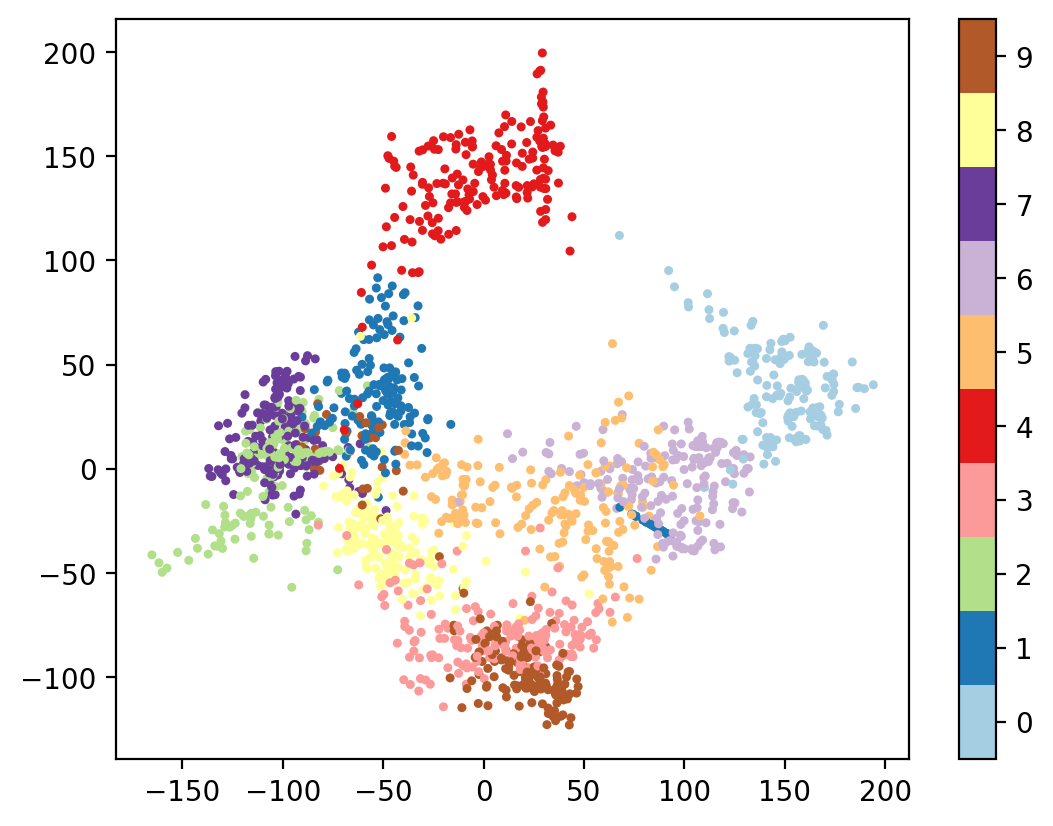

In [181]:
plt.style.use('default')

X, targ = load_digits(return_X_y=True) 
embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(X[:])

cmap = plt.get_cmap('Paired', 10)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s=5, c=targ, cmap=cmap)
plt.colorbar(ticks = range(10))
plt.clim(-0.5, 9.5)

If **return_X_y = True**, *load_digits* returns (data, target) = (X, _) where:
- **data** contains all the images but in an unraveled form: (N, 64) instead of (N, 8, 8)
- **target** contains the real classification labels so that you can check the result of the algorithm in the end

Notice this IsoMap is an **unsupervised** algorithm for dimensionality reduction, in fact we didn't use the *targets* to train the algorithm. This is done, instead, in **supervised** dimensionality reduction:

---
### Part 2: Supervised dimensionality reduction

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
    
X_train, X_test, targ_train, targ_test = train_test_split(X, targ, train_size=0.8, random_state=24)
clf = LogisticRegression(solver='sag')
clf.fit(X_train, targ_train)

pred_test = clf.predict(X_test)
pred_train = clf.predict(X_train)

# Computing the accuracy of the classifier both on the training and on the test sample
accuracy_test = accuracy_score(targ_test, pred_test)
accuracy_train = accuracy_score(targ_train, pred_train)
print('The accuracy of the classifier on the validation sample is: ', round(accuracy_test*100, 2), '%')
print('The accuracy of the classifier on the training sample is: ', round(accuracy_train*100, 1), '%')

The accuracy of the classifier on the validation sample is:  97.5 %
The accuracy of the classifier on the training sample is:  100.0 %


/home/nicolofiaba/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [171]:
print('Confusion matrix for the validation sample: \n\n', confusion_matrix(targ_test, pred_test), '\n')
print('Confusion matrix for the training sample: \n\n', confusion_matrix(targ_train, pred_train), '\n')

Confusion matrix for the validation sample: 

 [[32  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  1  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  1  1 30  0  0  0  1]
 [ 0  0  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  1]
 [ 0  1  0  0  0  0  0  0 26  0]
 [ 0  0  0  1  0  1  0  0  0 41]] 

Confusion matrix for the training sample: 

 [[146   0   0   0   0   0   0   0   0   0]
 [  0 146   0   0   0   0   0   0   0   0]
 [  0   0 139   0   0   0   0   0   0   0]
 [  0   0   0 138   0   0   0   0   0   0]
 [  0   0   0   0 144   0   0   0   0   0]
 [  0   0   0   0   0 149   0   0   0   0]
 [  0   0   0   0   0   0 138   0   0   0]
 [  0   0   0   0   0   0   0 153   0   0]
 [  0   0   0   0   0   0   0   0 147   0]
 [  0   0   0   0   0   0   0   0   0 137]] 



In [172]:
confusion_ind = np.where(confusion_matrix(targ_test, pred_test) == 1)
confusion_pairs = list(zip(confusion_ind[0], confusion_ind[1]))
for i, j in confusion_pairs:
    print(f"'%i' was confused once with '%i'"%(i, j))

'1' was confused once with '6'
'3' was confused once with '5'
'5' was confused once with '3'
'5' was confused once with '4'
'5' was confused once with '9'
'7' was confused once with '9'
'8' was confused once with '1'
'9' was confused once with '3'
'9' was confused once with '5'


`5` and `9` seem to be the most difficult digits to identify. 
$5$ was wrongly classified **three times** in this run while $9$ was misclassified **twice**, among the 20% test dataset.

#### Let's visualize all the misclassified digits now:

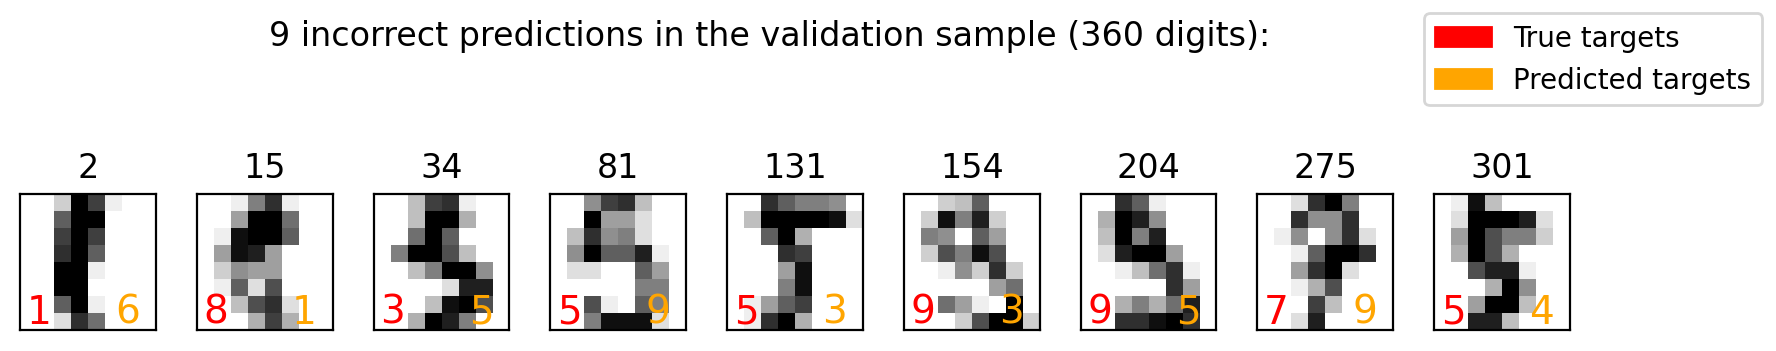

In [177]:
err_ind = [i for i, (t,p) in enumerate(zip(targ_test, pred_test)) if t != p]

X_test_mat = X_test.reshape((len(X_test), 8, 8)) #Here we go back to the 8x8 data in order to visualize the digits.

X_test_err = X_test_mat[err_ind]

fig, axes = plt.subplots(1, X_test_err.shape[0], figsize=(10, 2.5))
fig.subplots_adjust(hspace=0.1, wspace=0.3)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_err[i], 
              cmap='binary')
    ax.text(0.05, 0.05, str(targ_test[err_ind][i]),transform=ax.transAxes, color='red', fontsize=14)
    ax.text(0.7, 0.05, str(pred_test[err_ind][i]),transform=ax.transAxes, color='orange', fontsize=14)
    ax.set_title(str(err_ind[i]))
    ax.set_xticks([])
    ax.set_yticks([])
    
red_patch = mpatches.Patch(color='red', label='True targets')
orange_patch = mpatches.Patch(color='orange', label='Predicted targets')
fig.legend(handles=[red_patch, orange_patch], loc='upper right')

fig.suptitle(f'{len(err_ind)} incorrect predictions in the validation sample ({X_test.shape[0]} digits):')
plt.show()

#### Let's visualize the classifier prediction for a randomly extracted set of digits

- We extract $7\times7=49$ digits from the *test sample*, which contains 360 digits (30% of the whole dataset).

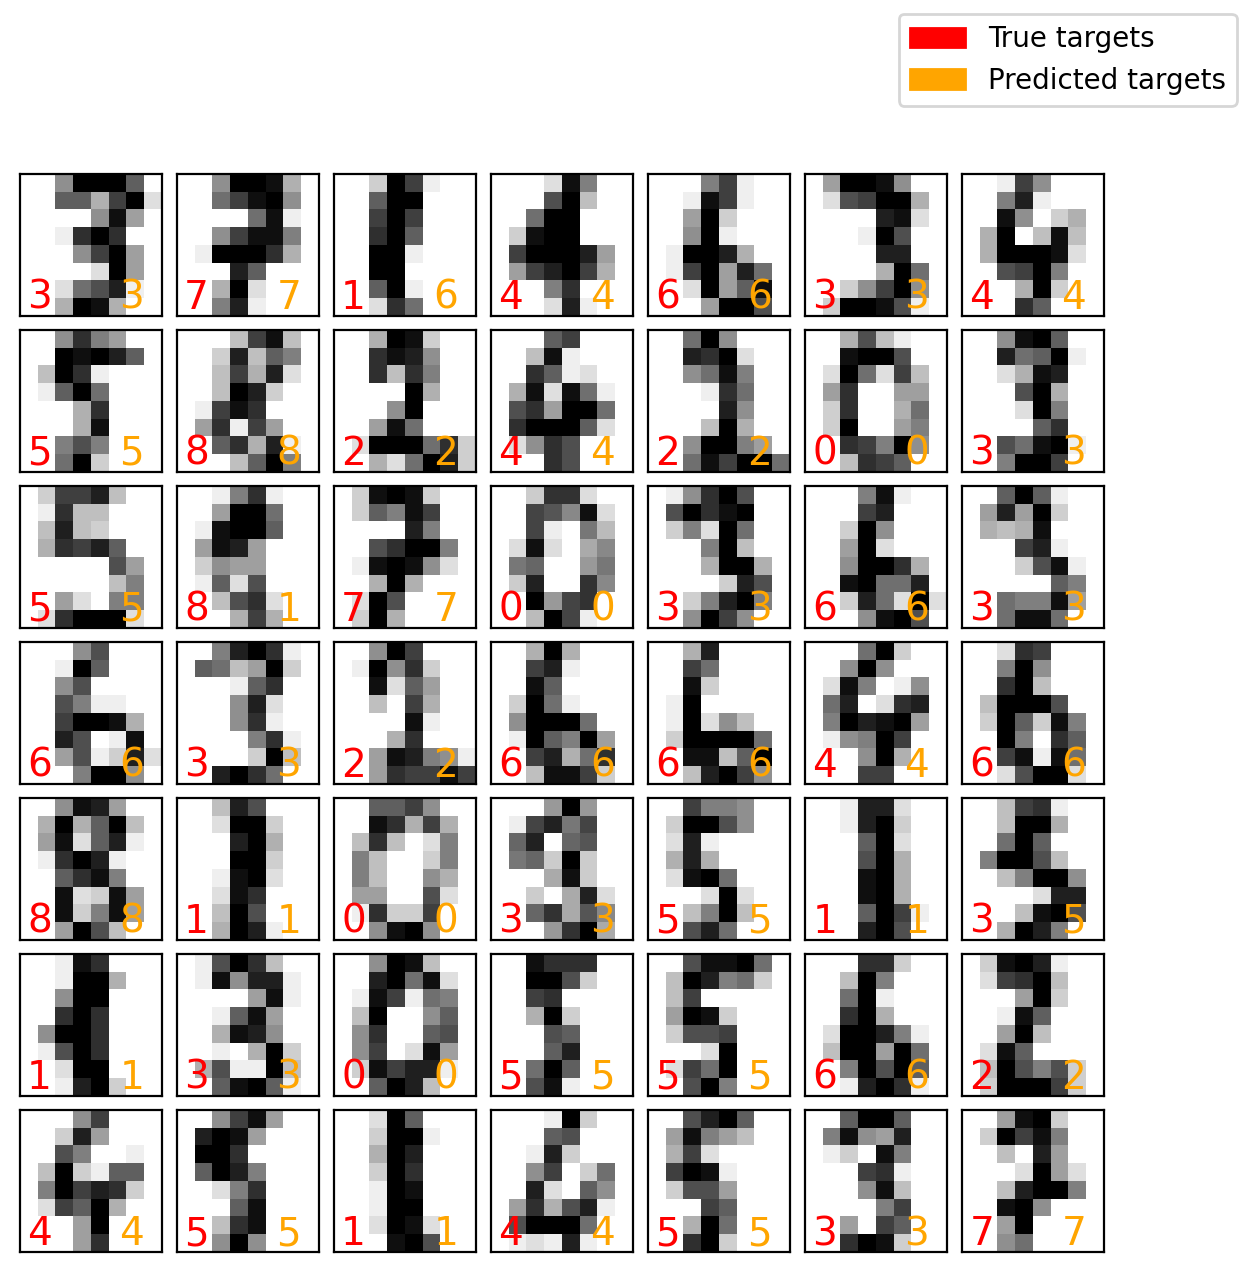

In [179]:
import matplotlib.patches as mpatches

fig, axes = plt.subplots(7,7, figsize=(7, 7))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

#np.random.seed(3)
mychoices = np.random.choice(X_test.shape[0], 49)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_mat[i], 
              cmap='binary')
    ax.text(0.05, 0.05, str(targ_test[i]),transform=ax.transAxes, color='red', fontsize=14)
    ax.text(0.7, 0.05, str(pred_test[i]),transform=ax.transAxes, color='orange', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

red_patch = mpatches.Patch(color='red', label='True targets')
orange_patch = mpatches.Patch(color='orange', label='Predicted targets')
fig.legend(handles=[red_patch, orange_patch], loc='upper right')

plt.show()